In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seniors_data = pd.read_csv("Seniors.csv")
juniors_data = pd.read_csv("Juniors.csv")

#cleaning of data
seniors_data = seniors_data.drop(["Unnamed: 0"], axis=1)
seniors_data = seniors_data.dropna()
juniors_data=juniors_data.drop(["Unnamed: 0"],axis=1)
juniors_data=juniors_data.dropna()
#printing the data
seniors_data.head()


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


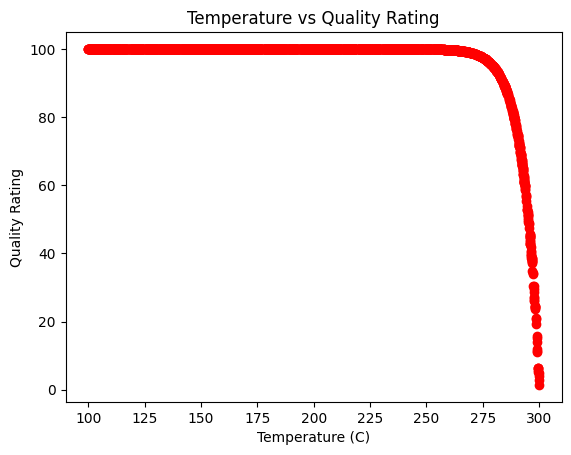

In [75]:
y=seniors_data["Quality Rating"]
x=seniors_data['Temperature (°C)']
plt.scatter(x,y,c="red")
plt.xlabel('Temperature (C)')
plt.ylabel('Quality Rating')
plt.title('Temperature vs Quality Rating')
plt.show()

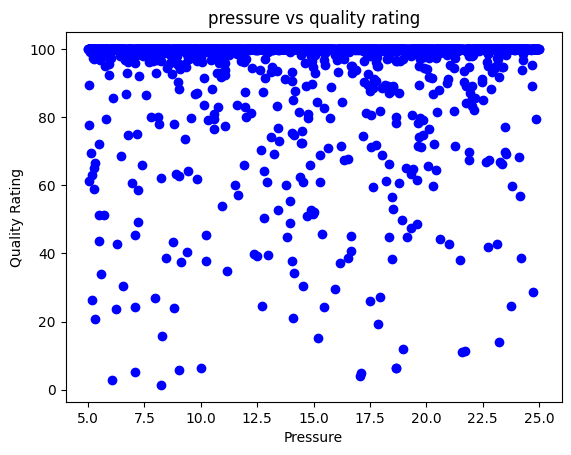

In [76]:
y=seniors_data["Quality Rating"]
x=seniors_data["Pressure (kPa)"]
plt.scatter(x,y,c="blue")
plt.xlabel("Pressure")
plt.ylabel("Quality Rating")
plt.title("pressure vs quality rating")
plt.show()

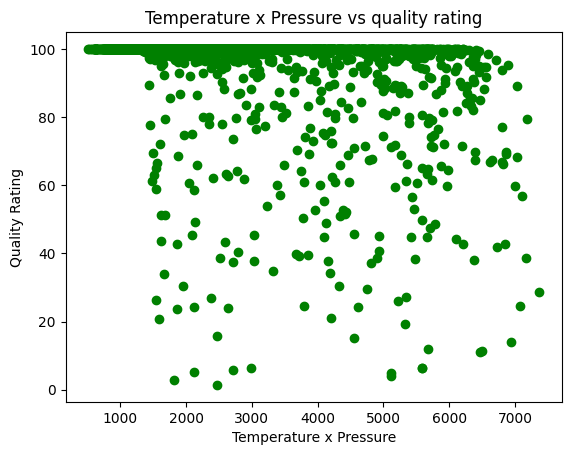

In [77]:
y=seniors_data["Quality Rating"]
x=seniors_data["Temperature x Pressure"]
plt.scatter(x,y,c="green")
plt.xlabel("Temperature x Pressure")
plt.ylabel("Quality Rating")
plt.title("Temperature x Pressure vs quality rating")
plt.show()

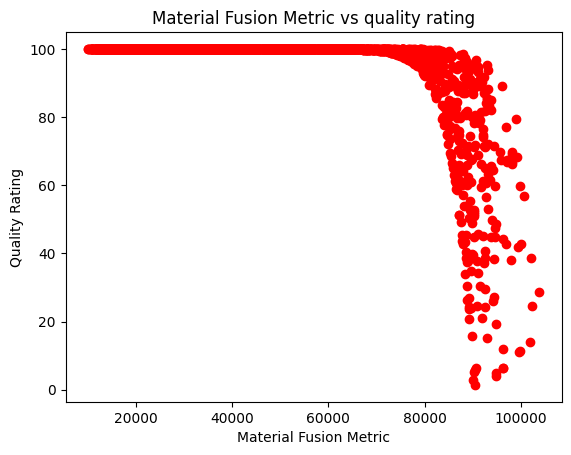

In [78]:
y=seniors_data["Quality Rating"]
x=seniors_data["Material Fusion Metric"]
plt.scatter(x,y,c="red")
plt.xlabel("Material Fusion Metric")
plt.ylabel("Quality Rating")
plt.title("Material Fusion Metric vs quality rating")
plt.show()

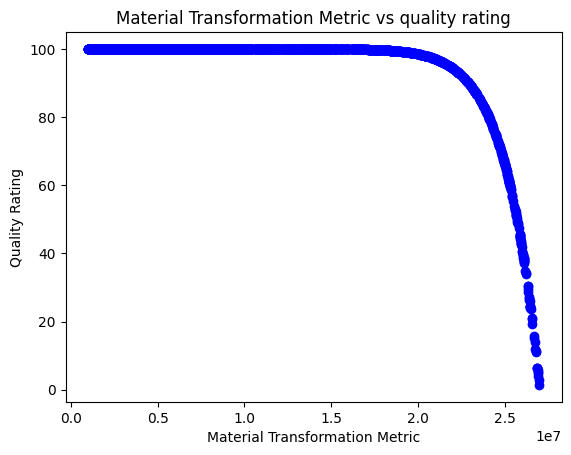

In [79]:
y=seniors_data["Quality Rating"]
x=seniors_data["Material Transformation Metric"]
plt.scatter(x,y,c="blue")
plt.xlabel("Material Transformation Metric")
plt.ylabel("Quality Rating")
plt.title("Material Transformation Metric vs quality rating")
plt.show()

none of the graph has a direct linear relation therefore the graph here we apply polynomial regression

In [80]:
#to separate the values
X_seniors = seniors_data.drop(['Quality Rating'], axis=1).values
y_seniors = seniors_data['Quality Rating'].values.reshape(-1, 1)
y_seniors=y_seniors.astype(float)

In [81]:
#to normalize the data
X_seniors_mean=X_seniors.mean(axis=0)
X_seniors_std=X_seniors.std(axis=0)
X_seniors=(X_seniors-X_seniors.mean())/(X_seniors_std)



C:\Users\mahek\AppData\Local\Temp\ipykernel_23960\2241628471.py:58: RuntimeWarning: invalid value encountered in subtract
  w -= lr*dw


Epoch 0 - loss: nan
Epoch 1000 - loss: nan
Epoch 2000 - loss: nan
Epoch 3000 - loss: nan
Epoch 4000 - loss: nan
Epoch 5000 - loss: nan
Epoch 6000 - loss: nan
Epoch 7000 - loss: nan
Epoch 8000 - loss: nan
Epoch 9000 - loss: nan


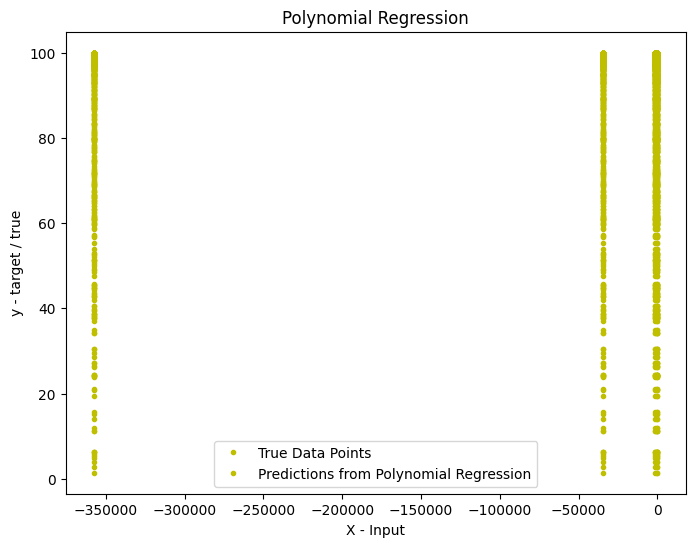

In [82]:
def loss_function(y_true, y_hat):

    loss = np.mean((y_hat - y_true)**2)

    return loss
def calculate_gradients(X, y_true, y_pred):

    num_rows = X.shape[0]

    dw = (1/num_rows)*np.dot(X.T, (y_pred - y_true))


    db = (1/num_rows)*np.sum((y_pred - y_true))

    return dw, db
def create_polynomial_feature_set(X, degrees):

    t = X.copy()


    for i in degrees:
        X = np.append(X, t**i, axis=1)

    return X
def train(X, y, batch_size, degrees, epochs, lr):

    x = create_polynomial_feature_set(X, degrees)


    m, n = x.shape


    w = np.zeros((n,1))
    b = 0


    y = y.reshape(m,1)


    losses = []


    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):


            start_i = i*batch_size
            end_i = start_i + batch_size
            x_batch = x[start_i:end_i]
            y_batch = y[start_i:end_i]

            y_hat = np.dot(x_batch, w) + b


            dw, db = calculate_gradients(x_batch, y_batch, y_hat) #Calculating gradients for weights and bias


            w -= lr*dw
            b -= lr*db


        l = loss_function(y, np.dot(x, w) + b)
        losses.append(l)


        if epoch % 1000 == 0:
            print(f"Epoch {epoch} - loss: {l}")
    return w, b, losses
def predict(X, w, b, degrees):



    x1 = create_polynomial_feature_set(X, degrees)

    return np.dot(x1, w) + b
    
w_trained, b_trained, losses_trained = train(X_seniors, Y_seniors, batch_size=100, degrees=[2], epochs=10000,lr=0.01)
y_hat = predict(X_seniors, w_trained, b_trained, [2])

# Plotting
fig = plt.figure(figsize=(8,6))

plt.plot(X_seniors, Y_seniors, 'y.')

plt.plot(X_seniors, y_hat, 'r.')

plt.legend(["True Data Points", "Predictions from Polynomial Regression"])

plt.xlabel('X - Input')

plt.ylabel('y - target / true')

plt.title('Polynomial Regression')

plt.show()

